# 문맥을 이용하여 모델 만들기

<pre>
#문장의 문맥을 학습시키는 것이기 때문에 2개,4개  (1개는 안됌. 문맥을 학습시키기 때문에)
# 밑에'가는 말이 고와야 오는 말이 곱다' 때문에 독립변수최대5개 

경마장에 있는  (0,0,0,0,2,3)               # 순서가 중요  2 다음에 3이 나오는게 중요
경마장에 있는 말이 (0,0,0,2,3,1)           # 종속변수1개,독립변수 최대가 5개  
경마장에 있는 말이 뛰고 (0,0,2,3,1,4)      # 4개중 3개가 독립변수 1개가 종속변수 
경마장에 있는 말이 뛰고 있다

그의 말이
그의 말이 법이다

가는 말이
가는 말이 고와야
가는 말이 고와야 오는
가는 말이 고와야 오는 말이
가는 말이 고와야 오는 말이 곱다

# 학습 횟수가 적을 수록 확률이 낮아짐.  (따라서 '가는 말이 고와야 오는 말이 곱다'이 가정 낮은 확률로 출력되고, '가는 말이' '가는 말이 고와야'가 높은 확률을 가지고 있음 )

경마장에 있는  (0,0,0,0,2,3)            
경마장에 있는 말이 (0,0,0,2,3,1)       
경마장에 있는 말이 뛰고 (0,0,2,3,1,4)     
경마장에 있는 말이 뛰고 있다
있는 말이
있는 말이 뛰고
있는 말이 뛰고 있다
말이 뛰고 
말이 뛰고 있다
뛰고 있다

In [3]:
text =""" 경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다
"""
# 컴퓨터가 '경마장에'를 0 이라고 인식 및 출력. 그러면 내가 0이 '경마장에'라고 또 바꿔야함

In [5]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts ([text])   #text를 '리스트'로 들어오게
encoded = t.texts_to_sequences([text])[0]
encoded    # '경마장에'가 '2'    '있는' 3    '말이'1      '뛰고'4
           # '2'이렇게 들어가는것이 아니라 ==> 예.0010000이런식으로 들어감.  우리는 '함수'를 쓰면됨

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]

In [8]:
print(encoded)
print(t.word_index)  #value가4이면, 거기에 'key값'- '뛰고'를 출력 

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [17]:
t.texts_to_sequences(['곱다','뛰고'])[0]      ######0번방

[11]

In [25]:
t.texts_to_sequences(['곱다','뛰고'])[0:2]       ###### 0번방,1번방 

[[11], [4]]

<pre>
경마장에 있는  (0,0,0,0,2,3)            
경마장에 있는 말이 (0,0,0,2,3,1)       
경마장에 있는 말이 뛰고 (0,0,2,3,1,4)     
경마장에 있는 말이 뛰고 있다
있는 말이 3,1
있는 말이 뛰고  3,1,4
있는 말이 뛰고 있다  3,1,4,5
말이 뛰고  1,4
말이 뛰고 있다 1,4,5
뛰고 있다 4,5

In [30]:
#위와 같은 내용을 학습하기 위해 for문 
sequences = []
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
#     print('원래 문장:',line)
#     print('encoded 문장:', encoded)
    for i in range(0,len(encoded)-1):  # len(encoded)-1 끝까지 가지 말고, 끝바로 앞까지 가라 
        for j in range(i+2, len(encoded)+1):
            sequences.append(encoded[i:j])
print()
for sequence in sequences:
#     print(sequence)
    print('[',end='')
    for word_seq in sequence:
        for key,value in t.word_index.items():
            if value == word_seq:
                print("{}:{}".format(value,key),end=',')
    print(']')



[2:경마장에,3:있는,]
[2:경마장에,3:있는,1:말이,]
[2:경마장에,3:있는,1:말이,4:뛰고,]
[2:경마장에,3:있는,1:말이,4:뛰고,5:있다,]
[3:있는,1:말이,]
[3:있는,1:말이,4:뛰고,]
[3:있는,1:말이,4:뛰고,5:있다,]
[1:말이,4:뛰고,]
[1:말이,4:뛰고,5:있다,]
[4:뛰고,5:있다,]
[6:그의,1:말이,]
[6:그의,1:말이,7:법이다,]
[1:말이,7:법이다,]
[8:가는,1:말이,]
[8:가는,1:말이,9:고와야,]
[8:가는,1:말이,9:고와야,10:오는,]
[8:가는,1:말이,9:고와야,10:오는,1:말이,]
[8:가는,1:말이,9:고와야,10:오는,1:말이,11:곱다,]
[1:말이,9:고와야,]
[1:말이,9:고와야,10:오는,]
[1:말이,9:고와야,10:오는,1:말이,]
[1:말이,9:고와야,10:오는,1:말이,11:곱다,]
[9:고와야,10:오는,]
[9:고와야,10:오는,1:말이,]
[9:고와야,10:오는,1:말이,11:곱다,]
[10:오는,1:말이,]
[10:오는,1:말이,11:곱다,]
[1:말이,11:곱다,]


In [31]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [3, 1],
 [3, 1, 4],
 [3, 1, 4, 5],
 [1, 4],
 [1, 4, 5],
 [4, 5],
 [6, 1],
 [6, 1, 7],
 [1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11],
 [1, 9],
 [1, 9, 10],
 [1, 9, 10, 1],
 [1, 9, 10, 1, 11],
 [9, 10],
 [9, 10, 1],
 [9, 10, 1, 11],
 [10, 1],
 [10, 1, 11],
 [1, 11]]

In [36]:
print([len(s) for s in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [40]:
# sequences에 제일 많은 단어가 들어 있는 갯수  
maxlen = max([len(s) for s in sequences])
maxlen 

6

In [42]:
# sequences를 훈련가능한 데이터로 만들기 
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences=sequences, maxlen=maxlen, padding='pre')
type(sequences), len(sequences),sequences   #왼쪽 '독립변수' , 맨 오른쪽 하나가 '종속변수'

(numpy.ndarray,
 28,
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [43]:
# 독립변수(x)와 종속변수(y) 분리
X = sequences[:,:-1]
Y = sequences[:,-1]
Y

array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
       11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11])

In [44]:
vocab_size = len(t.word_index)+1
vocab_size

12

In [52]:
# 종속변수Y를  원핫인코딩 
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)     #  num_classes=12 단어 갯수는 11이지만, 카테로기는 12 ??????????????????????????????


In [46]:
X.shape[1]

5

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# RNN 모델 생성
model = Sequential()
# 희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation="softmax"))

# 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.5023 - accuracy: 0.0000e+00
Epoch 2/300
1/1 - 0s - loss: 2.4901 - accuracy: 0.0000e+00
Epoch 3/300
1/1 - 0s - loss: 2.4780 - accuracy: 0.0357
Epoch 4/300
1/1 - 0s - loss: 2.4661 - accuracy: 0.1071
Epoch 5/300
1/1 - 0s - loss: 2.4542 - accuracy: 0.1429
Epoch 6/300
1/1 - 0s - loss: 2.4422 - accuracy: 0.2857
Epoch 7/300
1/1 - 0s - loss: 2.4299 - accuracy: 0.2857
Epoch 8/300
1/1 - 0s - loss: 2.4174 - accuracy: 0.2857
Epoch 9/300
1/1 - 0s - loss: 2.4043 - accuracy: 0.2857
Epoch 10/300
1/1 - 0s - loss: 2.3909 - accuracy: 0.2857
Epoch 11/300
1/1 - 0s - loss: 2.3768 - accuracy: 0.2857
Epoch 12/300
1/1 - 0s - loss: 2.3621 - accuracy: 0.2857
Epoch 13/300
1/1 - 0s - loss: 2.3468 - accuracy: 0.2857
Epoch 14/300
1/1 - 0s - loss: 2.3307 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.3139 - accuracy: 0.2857
Epoch 16/300
1/1 - 0s - loss: 2.2963 - accuracy: 0.2857
Epoch 17/300
1/1 - 0s - loss: 2.2779 - accuracy: 0.2857
Epoch 18/300
1/1 - 0s - loss: 2.2587 - accuracy: 

Epoch 147/300
1/1 - 0s - loss: 0.7492 - accuracy: 0.7857
Epoch 148/300
1/1 - 0s - loss: 0.7428 - accuracy: 0.7857
Epoch 149/300
1/1 - 0s - loss: 0.7364 - accuracy: 0.8214
Epoch 150/300
1/1 - 0s - loss: 0.7301 - accuracy: 0.8214
Epoch 151/300
1/1 - 0s - loss: 0.7239 - accuracy: 0.8214
Epoch 152/300
1/1 - 0s - loss: 0.7176 - accuracy: 0.8214
Epoch 153/300
1/1 - 0s - loss: 0.7115 - accuracy: 0.8214
Epoch 154/300
1/1 - 0s - loss: 0.7054 - accuracy: 0.8214
Epoch 155/300
1/1 - 0s - loss: 0.6993 - accuracy: 0.8214
Epoch 156/300
1/1 - 0s - loss: 0.6933 - accuracy: 0.8214
Epoch 157/300
1/1 - 0s - loss: 0.6873 - accuracy: 0.8214
Epoch 158/300
1/1 - 0s - loss: 0.6814 - accuracy: 0.8214
Epoch 159/300
1/1 - 0s - loss: 0.6755 - accuracy: 0.8214
Epoch 160/300
1/1 - 0s - loss: 0.6697 - accuracy: 0.8214
Epoch 161/300
1/1 - 0s - loss: 0.6639 - accuracy: 0.8214
Epoch 162/300
1/1 - 0s - loss: 0.6582 - accuracy: 0.8214
Epoch 163/300
1/1 - 0s - loss: 0.6525 - accuracy: 0.8214
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.2904 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.2894 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.2884 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.2874 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.2865 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.2855 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.2846 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.2837 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.2828 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.2819 - accuracy: 0.8929


In [54]:
# 모델 평가 
model.evaluate(X,Y)

1/1 [==============================] - 0s 361ms/step - loss: 0.2810 - accuracy: 0.8929


[0.2810249924659729, 0.8928571343421936]

In [56]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

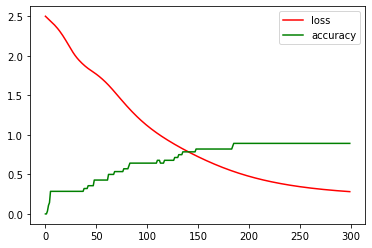

In [58]:
#학습과정 보기
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='r', label="loss")
plt.plot(hist.history['accuracy'], color='g', label='accuracy')
plt.legend()

In [66]:
# '경마장에 있는' 뒤에 나오는 단어를 model에 의해 추측 
encoded= t.texts_to_sequences(['경마장에 있는'])[0]  # 출력결과 [2,3]
encoded = pad_sequences([encoded],maxlen=5, padding='pre')  #출력결과 array([[0, 0, 0, 2, 3]])
result = model.predict_classes(encoded)   # result의 출력결과  array([1], dtype=int64)
print('예측결과값:', result[0])
for key,value in t.word_index.items():
    if value == result[0]:
        print("예측된 단어:", key)
        break  

예측결과값: 1
예측된 단어: 말이


In [72]:
# 입력받은 다음 단어 추측하기 
word = input("입력단어:")
# '경마장에 있는' 뒤에 나오는 단어를 model에 의해 추측 
encoded= t.texts_to_sequences([word])[0]  # 출력결과 [2,3]             #[word]이렇게 써야 ['word'] X   완전 다른 개념 
encoded = pad_sequences([encoded],maxlen=5, padding='pre')  #출력결과 array([[0, 0, 0, 2, 3]])
result = np.argmax(model.predict(encoded))  #argmax로 하면 => np로 안들어오고, 숫자하나로 들어옴     
print('예측결과값:', result)
for key,value in t.word_index.items():
    if value == result:
        print("예측된 단어:", key)
        break

입력단어:가는 말이
예측결과값: 9
예측된 단어: 고와야


# 다음 문맥 예측해 보기 

In [68]:
# "경마장에" 이후에 올 단어 4개 예측 => 경마장에 있는 말이 뛰고
#  -----                    --
def sentence_generation(model,t, current_word,n):
    init_word = current_word
    print("입력 단어:", init_word)
    sentence = ""
    for i in range(1,n+1):   #1번째 예측, 2번째 예측 
        encoded = t.texts_to_sequences([current_word])[0]          #2,3 이렇게 나옴. 그러나 메델안에 독립변수 5개. 따라서 5개로 바꿔야
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = np.argmax(model.predict(encoded))
        for word, index in t.word_index.items():      #앞에 word가 key, 뒤에index가 value
            if index == result:
                print("{}번째:{}:{}".format(i,word,result))
                current_word = current_word + ' ' + word 
                break;
    return current_word

In [69]:
#메소드 호출
sentence_generation(model,t,"경마장에",4)

입력 단어: 경마장에
1번째:있는:3
2번째:말이:1
3번째:뛰고:4
4번째:있다:5


'경마장에 있는 말이 뛰고 있다'

In [70]:
sentence_generation(model,t,"가는 말이",4)  # 뒤에 단어 4개 더 들어옴 

입력 단어: 가는 말이
1번째:고와야:9
2번째:오는:10
3번째:말이:1
4번째:곱다:11


'가는 말이 고와야 오는 말이 곱다'

# LSTM

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM    #long term short term memory

# RNN 모델 생성
model = Sequential()
# 희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(LSTM(32))
model.add(Dense(vocab_size, activation="softmax"))

# 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 2s - loss: 2.4843 - accuracy: 0.1429
Epoch 2/300
1/1 - 0s - loss: 2.4818 - accuracy: 0.1786
Epoch 3/300
1/1 - 0s - loss: 2.4794 - accuracy: 0.1429
Epoch 4/300
1/1 - 0s - loss: 2.4769 - accuracy: 0.1786
Epoch 5/300
1/1 - 0s - loss: 2.4743 - accuracy: 0.2143
Epoch 6/300
1/1 - 0s - loss: 2.4717 - accuracy: 0.2143
Epoch 7/300
1/1 - 0s - loss: 2.4690 - accuracy: 0.2143
Epoch 8/300
1/1 - 0s - loss: 2.4662 - accuracy: 0.2500
Epoch 9/300
1/1 - 0s - loss: 2.4633 - accuracy: 0.2500
Epoch 10/300
1/1 - 0s - loss: 2.4603 - accuracy: 0.2500
Epoch 11/300
1/1 - 0s - loss: 2.4572 - accuracy: 0.2500
Epoch 12/300
1/1 - 0s - loss: 2.4540 - accuracy: 0.2857
Epoch 13/300
1/1 - 0s - loss: 2.4506 - accuracy: 0.2857
Epoch 14/300
1/1 - 0s - loss: 2.4470 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.4433 - accuracy: 0.2857
Epoch 16/300
1/1 - 0s - loss: 2.4394 - accuracy: 0.2857
Epoch 17/300
1/1 - 0s - loss: 2.4353 - accuracy: 0.2857
Epoch 18/300
1/1 - 0s - loss: 2.4309 - accuracy: 0.2857
E

Epoch 147/300
1/1 - 0s - loss: 1.4552 - accuracy: 0.6071
Epoch 148/300
1/1 - 0s - loss: 1.4427 - accuracy: 0.6071
Epoch 149/300
1/1 - 0s - loss: 1.4299 - accuracy: 0.6071
Epoch 150/300
1/1 - 0s - loss: 1.4171 - accuracy: 0.6071
Epoch 151/300
1/1 - 0s - loss: 1.4041 - accuracy: 0.6071
Epoch 152/300
1/1 - 0s - loss: 1.3909 - accuracy: 0.6071
Epoch 153/300
1/1 - 0s - loss: 1.3777 - accuracy: 0.6071
Epoch 154/300
1/1 - 0s - loss: 1.3644 - accuracy: 0.6071
Epoch 155/300
1/1 - 0s - loss: 1.3509 - accuracy: 0.6071
Epoch 156/300
1/1 - 0s - loss: 1.3374 - accuracy: 0.6071
Epoch 157/300
1/1 - 0s - loss: 1.3239 - accuracy: 0.6071
Epoch 158/300
1/1 - 0s - loss: 1.3103 - accuracy: 0.6071
Epoch 159/300
1/1 - 0s - loss: 1.2968 - accuracy: 0.6071
Epoch 160/300
1/1 - 0s - loss: 1.2832 - accuracy: 0.6071
Epoch 161/300
1/1 - 0s - loss: 1.2697 - accuracy: 0.6071
Epoch 162/300
1/1 - 0s - loss: 1.2562 - accuracy: 0.6071
Epoch 163/300
1/1 - 0s - loss: 1.2428 - accuracy: 0.6071
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.4838 - accuracy: 0.8214
Epoch 292/300
1/1 - 0s - loss: 0.4815 - accuracy: 0.8214
Epoch 293/300
1/1 - 0s - loss: 0.4792 - accuracy: 0.8214
Epoch 294/300
1/1 - 0s - loss: 0.4769 - accuracy: 0.8214
Epoch 295/300
1/1 - 0s - loss: 0.4746 - accuracy: 0.8214
Epoch 296/300
1/1 - 0s - loss: 0.4724 - accuracy: 0.8214
Epoch 297/300
1/1 - 0s - loss: 0.4701 - accuracy: 0.8214
Epoch 298/300
1/1 - 0s - loss: 0.4679 - accuracy: 0.8214
Epoch 299/300
1/1 - 0s - loss: 0.4657 - accuracy: 0.8214
Epoch 300/300
1/1 - 0s - loss: 0.4635 - accuracy: 0.8214
